### Using Basic Linear Regression Models to Predict Real Estate House Prices in King County 

##### This project demonstrates the use of linear regression in determining the market price of a house given a set of features such as square footage, number of bedrooms, number of floors, and so on. The dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [160]:
# import standard libraries
import pandas as pd
import numpy as np
import csv
import html
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

# import sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [161]:
warnings.filterwarnings('ignore')

#### READING DATA

In [162]:
# downloading data and reading as dataframe

In [163]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [164]:
df = pd.read_csv(filepath)

In [165]:
# ensure all columns are displayed when viewing the data

In [166]:
pd.set_option("display.max_columns", None)

In [167]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### DATA WRANGLING

##### Display the data types of each column using the function dtypes.

In [168]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. 

In [169]:
df.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)

In [170]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [172]:
for cols in df.columns.to_list():
    nulls_count = df[cols].isnull().sum()
    print(f"Number of null data in {cols}: {nulls_count}")

Number of null data in date: 0
Number of null data in price: 0
Number of null data in bedrooms: 13
Number of null data in bathrooms: 10
Number of null data in sqft_living: 0
Number of null data in sqft_lot: 0
Number of null data in floors: 0
Number of null data in waterfront: 0
Number of null data in view: 0
Number of null data in condition: 0
Number of null data in grade: 0
Number of null data in sqft_above: 0
Number of null data in sqft_basement: 0
Number of null data in yr_built: 0
Number of null data in yr_renovated: 0
Number of null data in zipcode: 0
Number of null data in lat: 0
Number of null data in long: 0
Number of null data in sqft_living15: 0
Number of null data in sqft_lot15: 0


In [173]:
# We can see we have missing values for the columns bedrooms and bathrooms 

In [174]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [175]:
# We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). 

In [176]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [177]:
# We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace()

In [178]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [179]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


#### EXPLORATORY DATA ANALYSIS (EDA)

##### Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame.

In [180]:
floor_counts = df['floors'].value_counts()
floor_counts_df = floor_counts.reset_index()
floor_counts_df.columns = ['Floor', 'Count']

In [181]:
floor_counts_df

,Floor,Count
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


##### Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 

<Axes: xlabel='waterfront', ylabel='price'>

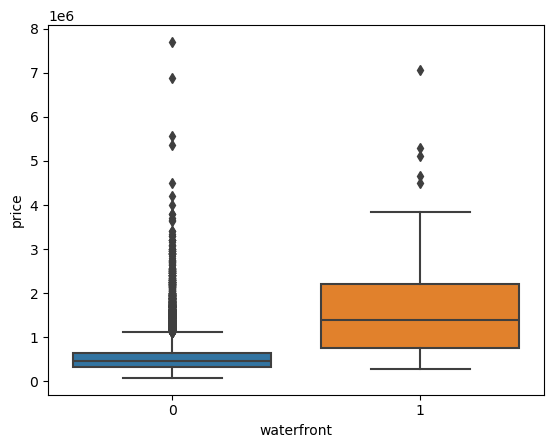

In [182]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

##### Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. 

<Axes: xlabel='sqft_above', ylabel='price'>

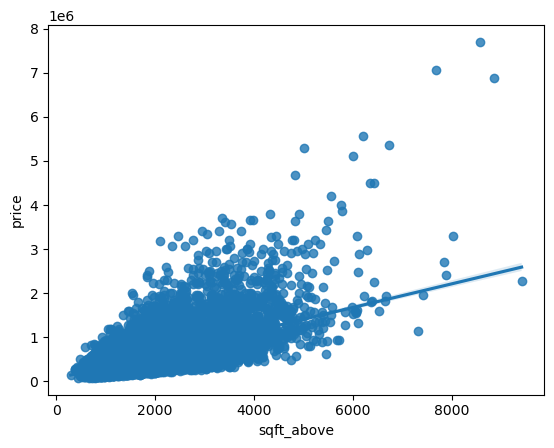

In [183]:
sns.regplot(x = 'sqft_above', y = 'price', data = df)

In [184]:
# We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [185]:
df.drop('date',axis = 1).corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

#### MODULE DEVELOPMENT

In [186]:
# We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [187]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

##### Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. 

In [188]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
Rsquared = lm.score(X, Y)

In [189]:
print(f" The model R-squared is: {Rsquared}")

 The model R-squared is: 0.4928532179037931


In [190]:
MSE = mean_squared_error(Y, lm.predict(X))

In [191]:
print(f" The model mean squared error is: {MSE}")

 The model mean squared error is: 68351286833.039825


##### Fit a linear regression model to predict the 'price' using the list of features:

In [192]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [193]:
Z = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(Z,Y)
Rsquared = lm.score(Z, Y)

In [194]:
print(f" The model R-squared is: {Rsquared}")

 The model R-squared is: 0.6576951666037498


In [195]:
MSE = mean_squared_error(Y, lm.predict(Z))

In [196]:
print(f" The model mean squared error is: {MSE}")

 The model mean squared error is: 46134524910.31392


##### Use a list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [197]:
# Create a list of tuples, the first element in the tuple contains the name of the estimator: 'scale', 'polynomial', 'model'

In [198]:
# The second element in the tuple contains the model constructor: StandardScaler(), PolynomialFeatures(include_bias=False), LinearRegression()

In [199]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [200]:
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
Rsquared = r2_score(Y,ypipe)
MSE = mean_squared_error(Y, ypipe)

In [201]:
print(f" The model R-squared is: {Rsquared}")

 The model R-squared is: 0.7513416722685895


In [202]:
print(f" The model mean squared error is: {MSE}")

 The model mean squared error is: 33513210143.901615


#### MODEL EVALUATION AND REFINEMENT

In [203]:
# We will split the data into training and testing sets.

In [204]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [205]:
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


##### Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 


In [206]:
RR = Ridge(alpha=0.1)
RidgeModel = RR.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
Rsquared = r2_score(y_test,yhat)
MSE = mean_squared_error(y_test, yhat)

In [207]:
print(f" The model R-squared is: {Rsquared}")

 The model R-squared is: 0.647875916393911


In [208]:
print(f" The model mean squared error is: {MSE}")

 The model mean squared error is: 51708591430.91997


##### Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. 

In [212]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RR = Ridge(alpha=0.1)
RidgeModel = RR.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
Rsquared = r2_score(y_test,y_hat)
MSE = mean_squared_error(y_test, y_hat)

In [213]:
print(f" The model R-squared is: {Rsquared}")

 The model R-squared is: 0.7002744259511818


In [214]:
print(f" The model mean squared error is: {MSE}")

 The model mean squared error is: 44013993848.900955


### Author: Paul John Julongbayan